![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 5 - Nonlinear Classification</center>
### <center> Kernel SVM</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/05_NonlinearClassfication/MainGaussianSVM.ipynb)

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 16})

#### Generate some data:

In [2]:
N     = 250
vTh   = np.linspace(0, 2*np.pi, N)
mX1   = 0.5 * np.c_[np.cos(vTh), np.sin(vTh)] + np.random.randn(N, 2) / 30
mX2   = 0.8 * np.c_[np.cos(vTh), np.sin(vTh)] + np.random.randn(N, 2) / 30

mX    = np.r_[mX1, mX2]
vY    = np.r_[1 * np.ones(N), -1 * np.ones(N)]

vIdx0 = vY == -1
vIdx1 = vY == 1

vSwap       = np.random.choice(2*N, N//5)
mX[vSwap,:] = mX[np.roll(vSwap, 1),:]

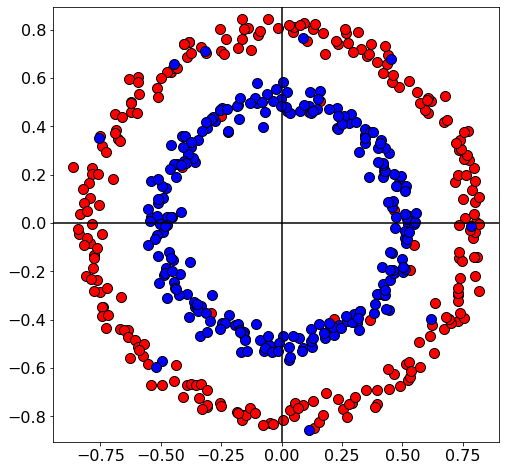

In [3]:
plt.figure (figsize=(8,8))
plt.scatter(mX[vIdx0,0], mX[vIdx0,1], s=100, color='r', edgecolor='k')
plt.scatter(mX[vIdx1,0], mX[vIdx1,1], s=100, color='b', edgecolor='k')
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.axis   ('equal')
plt.show   ()

#### Train a kernel SVM with a Guassian kernel (rbf):
$$K\left(\boldsymbol{x}_{i},\boldsymbol{x}_{j}\right)=\exp\left(-\gamma\left\Vert \boldsymbol{x}_{i}-\boldsymbol{x}_{j}\right\Vert _{2}^{2}\right)=\exp\left(-\frac{1}{2\sigma^{2}}\left\Vert \boldsymbol{x}_{i}-\boldsymbol{x}_{j}\right\Vert _{2}^{2}\right)$$

In [4]:
from sklearn.svm import SVC

#-- make grid for plot:
v0       = np.linspace(mX[:,0].min(), mX[:,0].max(), 150)
v1       = np.linspace(mX[:,1].min(), mX[:,1].max(), 150)
XX0, XX1 = np.meshgrid(v0, v1)
XX       = np.c_[XX0.ravel(), XX1.ravel()]

def PlotSVM(σ):
    #-- Train SVM:
    SvmClassifier = SVC(C=1, kernel='rbf', gamma=1/σ**2).fit(mX, vY)
    
    #-- Plot classification:
    vZ = SvmClassifier.predict(XX)
    mZ = vZ.reshape(XX0.shape)

    plt.figure  (figsize=(10,10))
    plt.contourf(XX0, XX1, mZ, colors=['red', 'blue'], alpha=0.3)
    plt.scatter (mX[vIdx0,0], mX[vIdx0,1], color='r')
    plt.scatter (mX[vIdx1,0], mX[vIdx1,1], color='b')
    plt.title   ('$\sigma = ' + str(σ) + '$')

In [5]:
from ipywidgets import interact, FloatSlider, Layout

σSlider = FloatSlider(min=0.01, max=5, step=0.01, value=1, layout=Layout(width='80%'))
interact(PlotSVM, σ=σSlider)
plt.show()

interactive(children=(FloatSlider(value=1.0, description='σ', layout=Layout(width='80%'), max=5.0, min=0.01, s…

### Exercise
* Train a kernel SVM (either `poly` or `rbf`) on the breast cancer data: `load_breast_cancer`.
* Use cross validation with 50 folds.
* Find the optimal hyper-parameters (`C=?`, `kernel=?`).
* Can you get better performance than a linear SVM?
* What is your best accuracy (averaging on over the 50 folds)?

#### Polynomial kernel:
$$
K\left(\boldsymbol{x}_{i},\boldsymbol{x}_{j}\right)=\left(1+\boldsymbol{x}_{i}^{T}\boldsymbol{x}_{j}\right)^{p}
$$

#### Guassian kernel (rbf):
$$K\left(\boldsymbol{x}_{i},\boldsymbol{x}_{j}\right)=\exp\left(-\gamma\left\Vert \boldsymbol{x}_{i}-\boldsymbol{x}_{j}\right\Vert _{2}^{2}\right)=\exp\left(-\frac{1}{2\sigma^{2}}\left\Vert \boldsymbol{x}_{i}-\boldsymbol{x}_{j}\right\Vert _{2}^{2}\right)$$

In [12]:
from sklearn.datasets import load_breast_cancer

dData = load_breast_cancer()
mX    = dData.data
vY    = dData.target

#-- Normalize data:
mX = mX - np.mean(mX, axis=0)
mX = mX / np.std (mX, axis=0)

mX.shape, vY.shape

((569, 30), (569,))

### Linear SVM:

In [11]:
import pandas as pd
from   sklearn.model_selection import cross_val_predict, KFold

dRes = pd.DataFrame(columns=['C', 'Accuracy'])

for C in np.linspace(1e-3, 2, 10):
    vHatY               = cross_val_predict(SVC(C=C, kernel='linear'), mX, vY, cv=KFold(50, shuffle=True))
    accuracy            = np.mean(vY == vHatY)
    dRes.loc[len(dRes)] = [C, accuracy]

dRes.sort_values(by='Accuracy', ascending=False)

,C,Accuracy
1,0.223111,0.977153
2,0.445222,0.977153
3,0.667333,0.975395
4,0.889444,0.975395
5,1.111556,0.973638
6,1.333667,0.973638
8,1.777889,0.973638
7,1.555778,0.971880
9,2.000000,0.971880
0,0.001000,0.942004


### Kernel SVM:

In [8]:
???

Object `?` not found.
